In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import cv2, os

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.backend import clear_session
from tensorflow.keras.optimizers import Adam

In [110]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

## 데이터 로딩

In [117]:
path = '/app/yumin/MiniProject_7th/data/sign_language.csv'

data = pd.read_csv(path)
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [118]:
data['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [119]:
data.shape

(27455, 785)

In [120]:
import string
class_names = list(string.ascii_lowercase)
len(class_names), class_names

(26,
 ['a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'])

In [121]:
target = 'label'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [122]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 20000, random_state = 2022)

In [123]:
x_train.shape, x_val.shape

((20000, 784), (7455, 784))

# XGBClassifier  ->  폐기ㅠ

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
xgb = XGBClassifier(max_depth=7, n_estimators=30, learning_rate=0.1)
xgb.fit(x_train, y_train_xgb)

y_pred_xgb = xgb_gs.predict(x_val)
y_pred_xgb = le.inverse_transform(y_pred_xgb)
print(classification_report(y_val, y_pred_xgb))

In [127]:
y_pred_xgb = xgb_gs.predict(x_val)
y_pred_xgb = le.inverse_transform(y_pred_xgb)
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.97      0.96      0.96       257
           2       1.00      0.99      0.99       301
           3       0.96      0.97      0.96       331
           4       0.97      0.96      0.96       271
           5       0.98      0.98      0.98       342
           6       0.98      0.97      0.97       290
           7       0.99      0.99      0.99       310
           8       0.96      0.98      0.97       299
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00       324
          11       0.00      0.00      0.00       348
          12       0.01      0.01      0.01       289
          13       0.00      0.00      0.00       293
          14       0.00      0.00      0.00       316
          15       0.01      0.01      0.01       302
          16       0.00      0.00      0.00       343
          17       0.00    

/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/

# CatboostClassifier

In [140]:
cbc = CatBoostClassifier()
cbc.fit(x_train, y_train)
y_pred_cbc = cbc.predict(x_val)

Learning rate set to 0.092188
0:	learn: 3.0036614	total: 844ms	remaining: 14m 3s
1:	learn: 2.8739205	total: 1.72s	remaining: 14m 18s
2:	learn: 2.7460813	total: 2.58s	remaining: 14m 18s
3:	learn: 2.6306990	total: 3.5s	remaining: 14m 30s
4:	learn: 2.5276619	total: 4.35s	remaining: 14m 25s
5:	learn: 2.4203088	total: 5.24s	remaining: 14m 27s
6:	learn: 2.3335236	total: 6.13s	remaining: 14m 29s
7:	learn: 2.2600171	total: 7.03s	remaining: 14m 32s
8:	learn: 2.1838999	total: 7.93s	remaining: 14m 33s
9:	learn: 2.1064388	total: 8.8s	remaining: 14m 31s
10:	learn: 2.0352642	total: 9.69s	remaining: 14m 31s
11:	learn: 1.9776741	total: 10.5s	remaining: 14m 27s
12:	learn: 1.9146035	total: 11.4s	remaining: 14m 25s
13:	learn: 1.8786180	total: 12.3s	remaining: 14m 23s
14:	learn: 1.8247405	total: 13.2s	remaining: 14m 25s
15:	learn: 1.7802940	total: 14.1s	remaining: 14m 24s
16:	learn: 1.7357161	total: 15s	remaining: 14m 25s
17:	learn: 1.6869576	total: 15.8s	remaining: 14m 23s
18:	learn: 1.6473714	total: 16.

154:	learn: 0.2896309	total: 2m 17s	remaining: 12m 30s
155:	learn: 0.2882550	total: 2m 18s	remaining: 12m 29s
156:	learn: 0.2861983	total: 2m 19s	remaining: 12m 28s
157:	learn: 0.2852460	total: 2m 20s	remaining: 12m 28s
158:	learn: 0.2838095	total: 2m 21s	remaining: 12m 27s
159:	learn: 0.2822573	total: 2m 22s	remaining: 12m 26s
160:	learn: 0.2806284	total: 2m 23s	remaining: 12m 25s
161:	learn: 0.2779811	total: 2m 23s	remaining: 12m 24s
162:	learn: 0.2770777	total: 2m 24s	remaining: 12m 23s
163:	learn: 0.2748934	total: 2m 25s	remaining: 12m 22s
164:	learn: 0.2726020	total: 2m 26s	remaining: 12m 22s
165:	learn: 0.2692601	total: 2m 27s	remaining: 12m 21s
166:	learn: 0.2685574	total: 2m 28s	remaining: 12m 20s
167:	learn: 0.2666202	total: 2m 29s	remaining: 12m 19s
168:	learn: 0.2654462	total: 2m 30s	remaining: 12m 18s
169:	learn: 0.2638782	total: 2m 31s	remaining: 12m 17s
170:	learn: 0.2610916	total: 2m 31s	remaining: 12m 16s
171:	learn: 0.2603038	total: 2m 32s	remaining: 12m 15s
172:	learn

304:	learn: 0.1352068	total: 4m 29s	remaining: 10m 15s
305:	learn: 0.1347102	total: 4m 30s	remaining: 10m 14s
306:	learn: 0.1334344	total: 4m 31s	remaining: 10m 13s
307:	learn: 0.1328664	total: 4m 32s	remaining: 10m 12s
308:	learn: 0.1322332	total: 4m 33s	remaining: 10m 11s
309:	learn: 0.1318512	total: 4m 34s	remaining: 10m 10s
310:	learn: 0.1312034	total: 4m 35s	remaining: 10m 9s
311:	learn: 0.1307648	total: 4m 36s	remaining: 10m 8s
312:	learn: 0.1303197	total: 4m 36s	remaining: 10m 7s
313:	learn: 0.1300597	total: 4m 37s	remaining: 10m 6s
314:	learn: 0.1296224	total: 4m 38s	remaining: 10m 6s
315:	learn: 0.1290769	total: 4m 39s	remaining: 10m 5s
316:	learn: 0.1287512	total: 4m 40s	remaining: 10m 4s
317:	learn: 0.1281747	total: 4m 41s	remaining: 10m 3s
318:	learn: 0.1279229	total: 4m 42s	remaining: 10m 2s
319:	learn: 0.1269028	total: 4m 43s	remaining: 10m 1s
320:	learn: 0.1266840	total: 4m 43s	remaining: 10m
321:	learn: 0.1260718	total: 4m 44s	remaining: 9m 59s
322:	learn: 0.1257849	tot

457:	learn: 0.0797587	total: 6m 45s	remaining: 8m
458:	learn: 0.0794991	total: 6m 46s	remaining: 7m 59s
459:	learn: 0.0793823	total: 6m 47s	remaining: 7m 58s
460:	learn: 0.0791749	total: 6m 48s	remaining: 7m 57s
461:	learn: 0.0790369	total: 6m 49s	remaining: 7m 56s
462:	learn: 0.0788892	total: 6m 50s	remaining: 7m 55s
463:	learn: 0.0787488	total: 6m 50s	remaining: 7m 54s
464:	learn: 0.0786166	total: 6m 51s	remaining: 7m 53s
465:	learn: 0.0782830	total: 6m 52s	remaining: 7m 52s
466:	learn: 0.0778407	total: 6m 53s	remaining: 7m 52s
467:	learn: 0.0773503	total: 6m 54s	remaining: 7m 51s
468:	learn: 0.0770805	total: 6m 55s	remaining: 7m 50s
469:	learn: 0.0766471	total: 6m 56s	remaining: 7m 49s
470:	learn: 0.0764957	total: 6m 57s	remaining: 7m 48s
471:	learn: 0.0764740	total: 6m 57s	remaining: 7m 47s
472:	learn: 0.0763113	total: 6m 58s	remaining: 7m 46s
473:	learn: 0.0760887	total: 6m 59s	remaining: 7m 45s
474:	learn: 0.0759613	total: 7m	remaining: 7m 44s
475:	learn: 0.0757191	total: 7m 1s	r

610:	learn: 0.0525401	total: 9m	remaining: 5m 44s
611:	learn: 0.0524095	total: 9m 1s	remaining: 5m 43s
612:	learn: 0.0522626	total: 9m 2s	remaining: 5m 42s
613:	learn: 0.0521993	total: 9m 3s	remaining: 5m 41s
614:	learn: 0.0520458	total: 9m 4s	remaining: 5m 40s
615:	learn: 0.0519322	total: 9m 5s	remaining: 5m 39s
616:	learn: 0.0517487	total: 9m 6s	remaining: 5m 39s
617:	learn: 0.0515940	total: 9m 7s	remaining: 5m 38s
618:	learn: 0.0514335	total: 9m 7s	remaining: 5m 37s
619:	learn: 0.0513838	total: 9m 8s	remaining: 5m 36s
620:	learn: 0.0513121	total: 9m 9s	remaining: 5m 35s
621:	learn: 0.0512420	total: 9m 10s	remaining: 5m 34s
622:	learn: 0.0511345	total: 9m 11s	remaining: 5m 33s
623:	learn: 0.0510217	total: 9m 12s	remaining: 5m 32s
624:	learn: 0.0509823	total: 9m 13s	remaining: 5m 31s
625:	learn: 0.0508153	total: 9m 14s	remaining: 5m 31s
626:	learn: 0.0506742	total: 9m 15s	remaining: 5m 30s
627:	learn: 0.0505124	total: 9m 15s	remaining: 5m 29s
628:	learn: 0.0504554	total: 9m 16s	remain

762:	learn: 0.0379848	total: 11m 15s	remaining: 3m 29s
763:	learn: 0.0379234	total: 11m 16s	remaining: 3m 28s
764:	learn: 0.0378416	total: 11m 17s	remaining: 3m 28s
765:	learn: 0.0377804	total: 11m 18s	remaining: 3m 27s
766:	learn: 0.0376904	total: 11m 19s	remaining: 3m 26s
767:	learn: 0.0376084	total: 11m 19s	remaining: 3m 25s
768:	learn: 0.0375339	total: 11m 20s	remaining: 3m 24s
769:	learn: 0.0374143	total: 11m 21s	remaining: 3m 23s
770:	learn: 0.0373138	total: 11m 22s	remaining: 3m 22s
771:	learn: 0.0372633	total: 11m 23s	remaining: 3m 21s
772:	learn: 0.0372204	total: 11m 24s	remaining: 3m 20s
773:	learn: 0.0371958	total: 11m 25s	remaining: 3m 20s
774:	learn: 0.0370967	total: 11m 26s	remaining: 3m 19s
775:	learn: 0.0370445	total: 11m 26s	remaining: 3m 18s
776:	learn: 0.0369817	total: 11m 27s	remaining: 3m 17s
777:	learn: 0.0368516	total: 11m 28s	remaining: 3m 16s
778:	learn: 0.0368166	total: 11m 29s	remaining: 3m 15s
779:	learn: 0.0367489	total: 11m 30s	remaining: 3m 14s
780:	learn

912:	learn: 0.0281728	total: 13m 27s	remaining: 1m 16s
913:	learn: 0.0281214	total: 13m 28s	remaining: 1m 16s
914:	learn: 0.0280404	total: 13m 29s	remaining: 1m 15s
915:	learn: 0.0280134	total: 13m 30s	remaining: 1m 14s
916:	learn: 0.0279262	total: 13m 31s	remaining: 1m 13s
917:	learn: 0.0278941	total: 13m 32s	remaining: 1m 12s
918:	learn: 0.0278154	total: 13m 33s	remaining: 1m 11s
919:	learn: 0.0277754	total: 13m 34s	remaining: 1m 10s
920:	learn: 0.0277370	total: 13m 34s	remaining: 1m 9s
921:	learn: 0.0276815	total: 13m 35s	remaining: 1m 9s
922:	learn: 0.0276538	total: 13m 36s	remaining: 1m 8s
923:	learn: 0.0276470	total: 13m 37s	remaining: 1m 7s
924:	learn: 0.0275450	total: 13m 38s	remaining: 1m 6s
925:	learn: 0.0274652	total: 13m 39s	remaining: 1m 5s
926:	learn: 0.0273999	total: 13m 40s	remaining: 1m 4s
927:	learn: 0.0273861	total: 13m 41s	remaining: 1m 3s
928:	learn: 0.0273742	total: 13m 42s	remaining: 1m 2s
929:	learn: 0.0273543	total: 13m 42s	remaining: 1m 1s
930:	learn: 0.027335

In [141]:
cn = np.array(class_names)
print(accuracy_score(y_val,y_pred_cbc))
print('-'*60)
print(confusion_matrix(y_val, y_pred_cbc))
print('-'*60)
print(classification_report(cn[y_val], cn[y_pred_cbc]))

0.9961099932930919
------------------------------------------------------------
[[318   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 256   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0]
 [  0   0 301   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 331   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 269   0   0   0   0   0   0   2   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 342   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 288   1   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 310   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 298   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0  

In [174]:
import joblib
joblib.dump(cbc, './cbc_model.pkl')


['./cbc_model.pkl']

---

# 딥러닝

In [175]:
x_train2, x_val2, y_train2, y_val2 = x_train.values, x_val.values, y_train.values, y_val.values

In [176]:
x_train2 = x_train2.reshape(20000,28,28,1)
x_val2 = x_val2.reshape(7455,28,28,1)

In [177]:
x_train2.shape, x_val2.shape

((20000, 28, 28, 1), (7455, 28, 28, 1))

In [178]:
x_train2 = x_train2 / 255.
x_val2 = x_val2 / 255.

In [179]:
clear_session()

m1 = Sequential()
m1.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', strides=1, activation='relu'))
m1.add(MaxPooling2D(2, 2))
m1.add(Dropout(0.2))

m1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
m1.add(MaxPooling2D(2, 2))
m1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
m1.add(Dropout(0.2))

m1.add(Flatten())
m1.add(Dense(128, activation='relu'))
m1.add(Dense(64, activation='relu'))
m1.add(Dense(25, activation='softmax'))


m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3

In [181]:
m1.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy')
history = m1.fit(x_train2, y_train2, epochs = 20, validation_split=0.2).history

Epoch 1/20
500/500 [==============================] - 4s 7ms/step - loss: 1.7983 - val_loss: 0.5069
Epoch 2/20
500/500 [==============================] - 4s 7ms/step - loss: 0.3695 - val_loss: 0.1100
Epoch 3/20
500/500 [==============================] - 4s 7ms/step - loss: 0.1356 - val_loss: 0.0521
Epoch 4/20
500/500 [==============================] - 4s 7ms/step - loss: 0.0756 - val_loss: 0.0263
Epoch 5/20
500/500 [==============================] - 4s 7ms/step - loss: 0.0455 - val_loss: 0.0247
Epoch 6/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0327 - val_loss: 0.0104
Epoch 7/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0373 - val_loss: 0.0067
Epoch 8/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0202 - val_loss: 0.0027
Epoch 9/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0209 - val_loss: 0.0092
Epoch 10/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0216 - val_loss: 0.0189

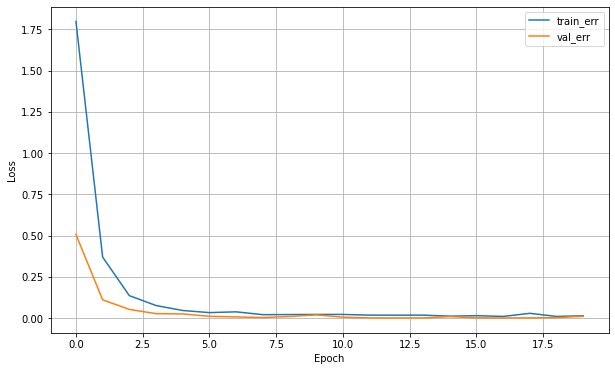

In [182]:
dl_history_plot(history)

In [183]:
p1 = m1.predict(x_val2)

233/233 [==============================] - 0s 2ms/step


In [184]:
p1_1 = p1.argmax(axis=1)
cn = np.array(class_names)

In [185]:
print(accuracy_score(y_val,p1_1))
print('-'*60)
print(confusion_matrix(y_val, p1_1))
print('-'*60)
print(classification_report(cn[y_val], cn[p1_1]))

0.996914822266935
------------------------------------------------------------
[[318   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 257   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 301   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 325   0   0   0   0   0   0   0   0   0   0   0   0   6   0
    0   0   0   0   0   0]
 [  0   0   0   0 271   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 342   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 290   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 309   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0 299   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   

In [197]:
img = cv2.imread('./test_data/KakaoTalk_20221122_113013645_01.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))

test_sign = img.reshape(1, 28, 28, 1)

test_sign = test_sign / 255.

pred = m1.predict(test_sign)
pred_1 = pred.argmax(axis=1)

1/1 [==============================] - 0s 12ms/step


In [198]:
import string
class_names = list(string.ascii_lowercase)
class_names = np.array(class_names)
class_names[pred_1]

array(['l'], dtype='<U1')